### Numpy array vs Python lists

In [1]:
import numpy as np

In [2]:
# speed
# list
a = [i for i in range(10000000)]
b = [i for i in range(10000000,20000000)]
import time

c = []

start = time.time()

for i in range(len(a)):
  c.append(a[i]+b[i])
print(time.time() - start)

2.480581521987915


In [3]:
# numpy
import numpy as np
a = np.arange(10000000)
b = np.arange(10000000,20000000)

start = time.time()
c = a + b
print(time.time()-start)

0.21080875396728516


In [66]:
2.6933066844940186/0.02294015884399414
# numpy is faster because list is an refrential as well as dynamic
# numpy is 50 times faster and consumes less space

117.40575567981043

In [4]:
# memory
a = [i for i in range(10000000)]
import sys

sys.getsizeof(a)

89095160

In [5]:
a = np.arange(10000000,dtype=np.int8)
sys.getsizeof(a)

10000112

In [69]:
89095160/10000112

8.909416214538398

In [70]:
# convenience

In [7]:
a = np.arange(12).reshape(3,4)
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [8]:
a[1:2,1::2]

array([[5, 7]])

### Advanced Indexing

In [10]:
# Fancy Indexing
a = np.arange(12).reshape(4,3)
a

array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11]])

In [11]:
a[[0,2,3]]

array([[ 0,  1,  2],
       [ 6,  7,  8],
       [ 9, 10, 11]])

In [12]:
a = np.arange(24).reshape(6,4)
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19],
       [20, 21, 22, 23]])

In [14]:
a[[0,2,3,5]]

array([[ 0,  1,  2,  3],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [20, 21, 22, 23]])

In [15]:
a[:,[0,2,3]]

array([[ 0,  2,  3],
       [ 4,  6,  7],
       [ 8, 10, 11],
       [12, 14, 15],
       [16, 18, 19],
       [20, 22, 23]])

fancy indexing always works as row,cloumn and rows and colums should be of same size a[[0,2,3],[0,2,3]]
indexing arrays could not be broadcast together with shapes (2,) (3,) 

In [16]:
a[[0,2,3],[0,2,3]]

array([ 0, 10, 15])

In [17]:
# Boolean Indexing
a = np.random.randint(1,100,24).reshape(6,4)
a

array([[46, 21,  1, 16],
       [76, 39, 90,  6],
       [70, 76, 74, 65],
       [57, 13, 94, 88],
       [38, 70,  8, 30],
       [13, 32, 41, 14]])

In [19]:
# find all numbers greater than 50
a[a>50]

array([76, 90, 70, 76, 74, 65, 57, 94, 88, 70])

In [21]:
a%2==0

array([[ True, False, False,  True],
       [ True, False,  True,  True],
       [ True,  True,  True, False],
       [False, False,  True,  True],
       [ True,  True,  True,  True],
       [False,  True, False,  True]])

In [20]:
# find out even numbers
a[a%2==0]

array([46, 16, 76, 90,  6, 70, 76, 74, 94, 88, 38, 70,  8, 30, 32, 14])

In [30]:
# find all numbers greater than 50 and are even
a[(a>50) & (a%2==0)]
#  ampersent sign cuz we are dealing with boolean values

array([76, 90, 70, 76, 74, 94, 88, 70])

In [32]:
# find all numbers not divisible by 7
a[(a % 7 != 0)]

array([46,  1, 16, 76, 39, 90,  6, 76, 74, 65, 57, 13, 94, 88, 38,  8, 30,
       13, 32, 41])

In [33]:
a[~(a % 7 == 0)]

array([46,  1, 16, 76, 39, 90,  6, 76, 74, 65, 57, 13, 94, 88, 38,  8, 30,
       13, 32, 41])

### Broadcasting

The term broadcasting describes how NumPy treats arrays with different shapes during arithmetic operations.

The smaller array is “broadcast” across the larger array so that they have compatible shapes.

In [34]:
# same shape
a = np.arange(6).reshape(2,3)
b = np.arange(6,12).reshape(2,3)

print(a)
print(b)

print(a+b)

[[0 1 2]
 [3 4 5]]
[[ 6  7  8]
 [ 9 10 11]]
[[ 6  8 10]
 [12 14 16]]


In [42]:
# diff shape
a = np.arange(6).reshape(2,3)
b = np.arange(3).reshape(1,3)

print(a)
print(b)

print(a+b)

[[0 1 2]
 [3 4 5]]
[[0 1 2]]
[[0 2 4]
 [3 5 7]]


In [41]:
a = np.random.randint((3,4))
b = np.random.randint((1,6))
print(a)
print(b)
a+b

[0 0]
[0 3]


array([0, 3])

#### Broadcasting Rules

**1. Make the two arrays have the same number of dimensions.**<br>
- If the numbers of dimensions of the two arrays are different, add new dimensions with size 1 to the head of the array with the smaller dimension.<br>

**2. Make each dimension of the two arrays the same size.**<br>
- If the sizes of each dimension of the two arrays do not match, dimensions with size 1 are stretched to the size of the other array.
- If there is a dimension whose size is not 1 in either of the two arrays, it cannot be broadcasted, and an error is raised.

<img src = "https://jakevdp.github.io/PythonDataScienceHandbook/figures/02.05-broadcasting.png">

In [43]:
# More examples

a = np.arange(12).reshape(4,3)
b = np.arange(3)

print(a)
print(b)

print(a+b)

[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]]
[0 1 2]
[[ 0  2  4]
 [ 3  5  7]
 [ 6  8 10]
 [ 9 11 13]]


In [44]:
a = np.arange(12).reshape(3,4)
b = np.arange(3)

print(a)
print(b)

print(a+b)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
[0 1 2]


ValueError: operands could not be broadcast together with shapes (3,4) (3,) 

In [46]:
a = np.arange(3).reshape(1,3)
b = np.arange(3).reshape(3,1)

print(a)
print(b)

print(a+b)

[[0 1 2]]
[[0]
 [1]
 [2]]
[[0 1 2]
 [1 2 3]
 [2 3 4]]


In [47]:
a = np.arange(3).reshape(1,3)
b = np.arange(4).reshape(4,1)

print(a)
print(b)

print(a + b)

[[0 1 2]]
[[0]
 [1]
 [2]
 [3]]
[[0 1 2]
 [1 2 3]
 [2 3 4]
 [3 4 5]]


In [48]:
a = np.array([1])
# shape -> (1,1)
b = np.arange(4).reshape(2,2)
# shape -> (2,2)

print(a)
print(b)

print(a+b)

[1]
[[0 1]
 [2 3]]
[[1 2]
 [3 4]]


In [49]:
a = np.arange(12).reshape(3,4)
b = np.arange(12).reshape(4,3)

print(a)
print(b)

print(a+b)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]]


ValueError: operands could not be broadcast together with shapes (3,4) (4,3) 

In [50]:
a = np.arange(16).reshape(4,4)
b = np.arange(4).reshape(2,2)

print(a)
print(b)

print(a+b)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]]
[[0 1]
 [2 3]]


ValueError: operands could not be broadcast together with shapes (4,4) (2,2) 

### Working with mathematical formulas

In [51]:
a = np.arange(10)
np.sin(a)

array([ 0.        ,  0.84147098,  0.90929743,  0.14112001, -0.7568025 ,
       -0.95892427, -0.2794155 ,  0.6569866 ,  0.98935825,  0.41211849])

In [ ]:
# sigmoid
def sigmoid (araray):
  return 1/(1 + np.exp(-(araray)))

a = np.arange(100)
sigmoid(a)


array([0.5       , 0.73105858, 0.88079708, 0.95257413, 0.98201379,
       0.99330715, 0.99752738, 0.99908895, 0.99966465, 0.99987661,
       0.9999546 , 0.9999833 , 0.99999386, 0.99999774, 0.99999917,
       0.99999969, 0.99999989, 0.99999996, 0.99999998, 0.99999999,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.     

In [53]:
# mean squared error

actual = np.random.randint(1,50,25)
predicted  = np.random.randint(1,50,25)

In [54]:
actual

array([23, 29, 28,  2, 21, 31, 21, 17, 42, 10, 20, 33, 23, 16, 35, 39, 38,
       13, 43, 45, 41, 42, 49, 48, 38])

In [55]:
predicted

array([11, 30, 12, 18,  9, 27, 44, 43, 23, 12, 26, 45,  3,  4, 41, 42, 21,
       22, 34, 47, 29, 24, 16, 12, 11])

In [56]:
def msq(a,b):
    return np.average((a-b)**2)

msq(actual,predicted)

287.72

In [57]:
a = (actual-predicted)**2
np.mean(a)

287.72

In [ ]:
# binary cross entropy


500.12

### Working with missing values

In [59]:
# Working with missing values -> np.nan
a = np.array([1,2,3,4,np.nan,6])
a

array([ 1.,  2.,  3.,  4., nan,  6.])

In [64]:
a[~np.isnan(a)]

array([1., 2., 3., 4., 6.])

In [61]:
y = np.array([1,2,4,45,6346,3,np.nan])
y

array([1.000e+00, 2.000e+00, 4.000e+00, 4.500e+01, 6.346e+03, 3.000e+00,
             nan])

In [62]:
y[~(np.isnan(y))]

array([1.000e+00, 2.000e+00, 4.000e+00, 4.500e+01, 6.346e+03, 3.000e+00])

### Plotting Graphs

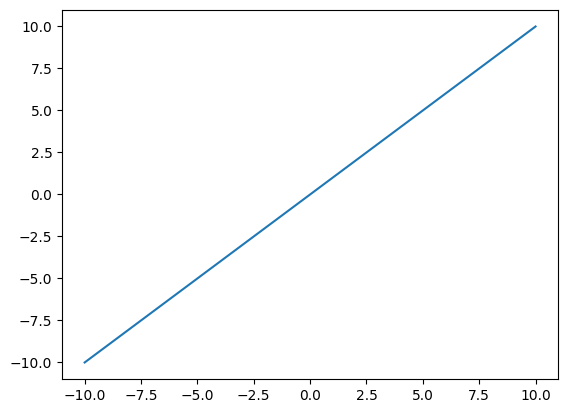

In [65]:
# plotting a 2D plot
# x = y
import matplotlib.pyplot as plt

x = np.linspace(-10,10,100)
y = x

plt.plot(x,y)

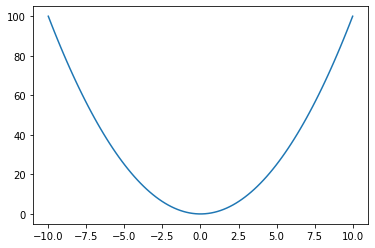

In [ ]:
# y = x^2
x = np.linspace(-10,10,100)
y = x**2

plt.plot(x,y)

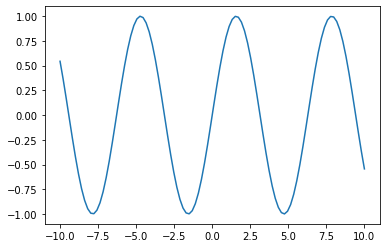

In [ ]:
# y = sin(x)
x = np.linspace(-10,10,100)
y = np.sin(x)

plt.plot(x,y)

<ipython-input-137-4b3958c08378>:3: RuntimeWarning: invalid value encountered in log
  y = x * np.log(x)


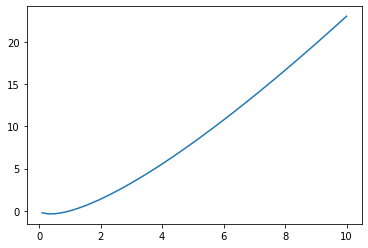

In [ ]:
# y = xlog(x)
x = np.linspace(-10,10,100)
y = x * np.log(x)

plt.plot(x,y)

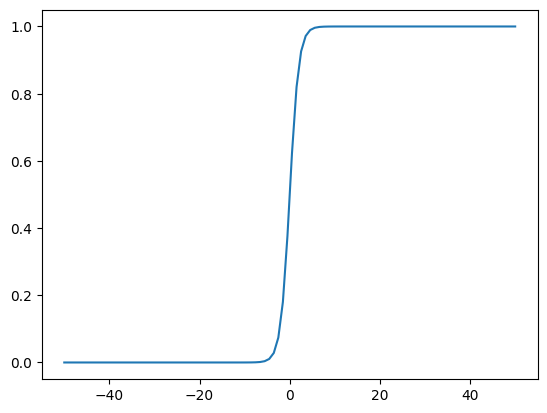

In [67]:
import matplotlib.pyplot as plt

a = np.linspace(-50,50,100)
b = 1/(1 + np.exp(-(a)))

plt.plot(a,b)

### Meshgrids

In [ ]:
# Meshgrids